In [1]:
# !/usr/bin/python
# -*- coding:utf-8 -*-

import warnings

import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname='../fonts/simhei.ttf', size=15)
fontproperties=font_set
mpl.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
def expand(a, b, rate=0.05):
    d = (b - a) * rate
    return a - d, b + d

In [5]:
np.random.seed(0)
cov1 = np.diag((1, 2))
N1 = 500
N2 = 300
N = N1 + N2
x1 = np.random.multivariate_normal(mean=(3, 2), cov=cov1, size=N1)
m = np.array(((1, 1), (1, 3)))
x1 = x1.dot(m)
x2 = np.random.multivariate_normal(mean=(-1, 10), cov=cov1, size=N2)
x = np.vstack((x1, x2))
y = np.array([0] * N1 + [1] * N2)

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(x)
centers = gmm.means_
covs = gmm.covariances_
print 'GMM均值 = \n', centers
print 'GMM方差 = \n', covs
y_hat = gmm.predict(x)

GMM均值 = 
[[ -0.9854541   10.07568927]
 [  4.88245286   8.69755   ]]
GMM方差 = 
[[[  0.89072605  -0.02570275]
  [ -0.02570275   1.95107155]]

 [[  2.86653758   6.62893122]
  [  6.62893122  17.97377445]]]


[-29.75101362 -29.9079518  -30.06590288 ...,  -8.08772322  -8.10398308
  -8.12125586]


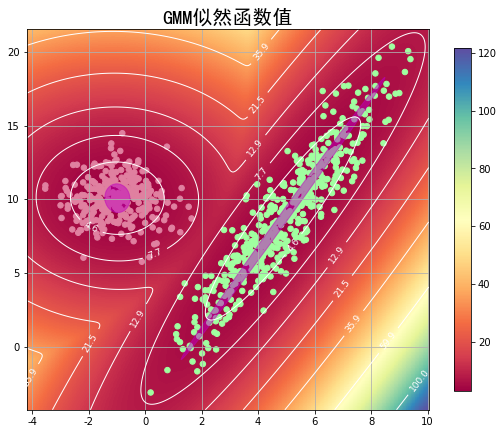

In [6]:
colors = '#A0FFA0', '#E080A0',
levels = 10
cm = mpl.colors.ListedColormap(colors)
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()
x1_min, x1_max = expand(x1_min, x1_max)
x2_min, x2_max = expand(x2_min, x2_max)
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
grid_test = np.stack((x1.flat, x2.flat), axis=1)
print gmm.score_samples(grid_test)
grid_hat = -gmm.score_samples(grid_test)
grid_hat = grid_hat.reshape(x1.shape)
plt.figure(figsize=(9, 7), facecolor='w')
ax = plt.subplot(111)
cmesh = plt.pcolormesh(x1, x2, grid_hat, cmap=plt.cm.Spectral)
plt.colorbar(cmesh, shrink=0.9)
CS = plt.contour(x1, x2, grid_hat, levels=np.logspace(0, 2, num=levels, base=10), colors='w', linewidths=1)
plt.clabel(CS, fontsize=9, inline=True, fmt='%.1f')
plt.scatter(x[:, 0], x[:, 1], s=30, c=y, cmap=cm, marker='o')

for i, cc in enumerate(zip(centers, covs)):
    center, cov = cc
    value, vector = sp.linalg.eigh(cov)
    width, height = value[0], value[1]
    v = vector[0] / sp.linalg.norm(vector[0])
    angle = 180 * np.arctan(v[1] / v[0]) / np.pi
    e = Ellipse(xy=center, width=width, height=height,
                angle=angle, color='m', alpha=0.5, clip_box=ax.bbox)
    ax.add_artist(e)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
plt.title(u'GMM似然函数值', fontsize=20, fontproperties=fontproperties)
plt.grid(True)
plt.show()